# Least squares fitting using ``linfit.py``

This notebook demonstrates the function ``linfit``, which I propose adding to the SciPy library.  

``linfit`` is designed to be a fast, lightweight function, written entirely in Python, that only calculates only as much as the user desires, and no more.  It can handle arbitrarily large data sets.

### What is ``linfit`` and what does it do?

``linfit`` is a function that performs least squares fitting of a straight line to an $(x,y)$ data set.  It has the following features:

* ``linfit`` can fit a straight line $ax+b$ to unweighted $(x,y)$ data where the output is the slope $a$ and y-intercept $b$ that minimizes the square of the residuals $$E = \sum_{i=1}^n \left[ y_i-(ax_i+b) \right]^2$$ where $n$ is the number of data points.

    - Optional outputs:
    
        - $\Delta a$ and $\Delta b$, the respective uncertainties in the fitted values of $a$ and $b$.  By default, these estimates of $\Delta a$ and $\Delta b$ use the residuals $|y_i-(ax_i+b)|$ as estimates of the uncertainties $\sigma_i$ of the data ("relative weighting").
        - $y_i-(ax_i+b)$, the residuals.

* Alternatively, ``linfit`` can fit a straight line $ax+b$ to $(x,y)$ data that is weighted using estimates of the uncertainties of the data provided as an optional keyword argument.  The uncertanties can be expressed as either as (1) a single number $\sigma$ or (2) as an array of uncertainties $\sigma_i$. In the first case, the output is the slope $a$ and y-intercept $b$ that minimizes $\chi^2$, which is defined as $$\chi^2 = \frac{1}{\sigma^2}\sum_{i=0}^n \left[ y_i-(a x_i + b) \right]^2$$In the second case, the output is the slope $a$ and y-intercept $b$ that minimizes $\chi^2$, which is defined as $$\chi^2 = \sum_{i=0}^n \left[ \frac{y_i-(a x_i + b)}{\sigma_i} \right]^2$$

    - Optional outputs:

        - $\chi^2/(n-2)$, the reduced value of $\chi^2$, which should be approximately equal to 1 if a straight line is a good model of the data and good error estimates $\sigma_i$ are provided.
    
        - $\Delta a$ and $\Delta b$, the uncertainties $\Delta a$ and $\Delta b$ in the fitted values of $a$ and $b$.  By default, these estimates of $\Delta a$ and $\Delta b$ use the residuals $|y_i-(ax_i+b)|$ as estimates of the uncertainties $\sigma_i$ of the data.
        - $y_i-(ax_i+b)$, the residuals.

``linfit`` can also be used for nonlinear fitting for functions that can be transformed to be linear in the fitting parameters.  In this case, using weighting is essential to get the fit right.

### Demonstrations of ``linfit.py``

Import libraries we will need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # for unequal plot boxes
from linfit import linfit

### Very simple demonstration.

Perform a simple linear fit without any weighting.

In [2]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
fit, cvm = linfit(x, y)
print("slope = {0:0.2f}, y-intercept = {1:0.2f}".format(fit[0], fit[1]))

slope = 1.00, y-intercept = -0.95


Plot the above data and fit.

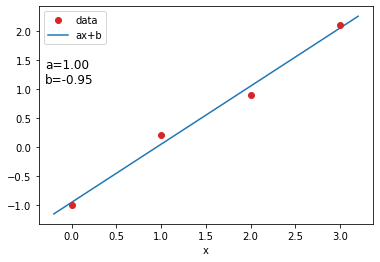

In [3]:
xfit = np.array([-0.2, 3.2])
yfit = fit[0]*xfit + fit[1]
plt.plot(x, y, 'oC3', label="data")
plt.plot(xfit, yfit, zorder=-1, label="ax+b")
plt.text(-0.3, 1.1, "a={0:0.2f}\nb={1:0.2f}"
         .format(fit[0], fit[1]), fontsize=12)
plt.legend(loc="upper left")
plt.xlabel('x')
plt.show()

Perform same fit without weighting but get estimates for uncertainties in slope and y-intercept from covariance matrix.

In [4]:
fit, cvm = linfit(x, y, relsigma=True)
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
print(u"slope = {0:0.2f} \xb1 {1:0.2f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.2f} \xb1 {1:0.2f}".format(fit[1], dfit[1]))

slope = 1.00 ± 0.07
y-intercept = -0.95 ± 0.13


### Demonstration of a fit to data with error estimates for each data point

In [5]:
# data set for linear fitting 
x = np.array([2.3, 4.7, 7.1, 9.6, 11.7, 14.1, 16.4, 18.8, 21.1, 23.0])
y = np.array([-25., 3., 110., 110., 230., 300., 270., 320., 450., 400.])
sigmay = np.array([15., 30., 30., 40., 40., 50., 40., 30., 50., 30.])

# Fit linear data set with weighting
fit, cvm, info = linfit(x, y, sigmay=sigmay, relsigma=False, return_all=True)
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
print(u"slope = {0:0.1f} \xb1 {1:0.1f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.0f} \xb1 {1:0.0f}".format(fit[1], dfit[1]))

slope = 21.7 ± 1.2
y-intercept = -72 ± 15


Plot the data with error bars together with the fit.  Plot the residuals in a separate graph above the data with fit.

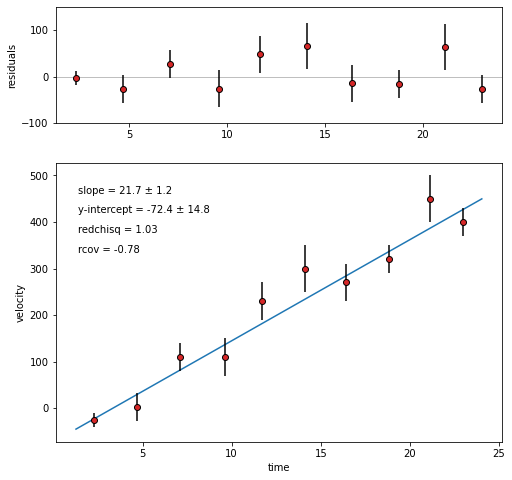

In [6]:
# Open figure window for plotting data with linear fit
fig = plt.figure(1, figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2.5, 6])

# Bottom plot: data and fit
ax1 = fig.add_subplot(gs[1])

# Plot data with error bars
ax1.errorbar(x, y, yerr=sigmay, ecolor='k', mec='k', fmt='oC3', ms=6)

# Plot fit (behind data)
endx = 0.05 * (x.max() - x.min())
xFit = np.array([x.min() - endx, x.max() + endx])
yFit = fit[0] * xFit + fit[1]
ax1.plot(xFit, yFit, '-', zorder=-1)

# Print out results of fit on plot
ax1.text(0.05, 0.9,  # slope of fit
         u'slope = {0:0.1f} \xb1 {1:0.1f}'.format(fit[0], dfit[0]),
         ha='left', va='center', transform=ax1.transAxes)
ax1.text(0.05, 0.83,  # y-intercept of fit
         u'y-intercept = {0:0.1f} \xb1 {1:0.1f}'.format(fit[1], dfit[1]),
         ha='left', va='center', transform=ax1.transAxes)
ax1.text(0.05, 0.76,  # reduced chi-squared of fit
         'redchisq = {0:0.2f}'.format(info.rchisq),
         ha='left', va='center', transform=ax1.transAxes)
ax1.text(0.05, 0.69,  # correlation coefficient of fitted slope & y-intercept
         'rcov = {0:0.2f}'.format(cvm[0, 1] / (dfit[0] * dfit[1])),
         ha='left', va='center', transform=ax1.transAxes)

# Label axes
ax1.set_xlabel('time')
ax1.set_ylabel('velocity')

# Top plot: residuals
ax2 = fig.add_subplot(gs[0])
ax2.axhline(color='gray', lw=0.5, zorder=-1)
ax2.errorbar(x, info.resids, yerr=sigmay, ecolor='k', mec='k', fmt='oC3', ms=6)
ax2.set_ylabel('residuals')
ax2.set_ylim(-100, 150)
ax2.set_yticks((-100, 0, 100))

plt.show()



Fit the same $(x,y)$ data set but with a single value of $\sigma$ for the entire data set.

In [7]:
sigmay0 = 34.9
fit, cvm, info = linfit(x, y, sigmay=sigmay0, relsigma=False, return_all=True)
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
print(u"slope = {0:0.1f} \xb1 {1:0.1f}".format(fit[0], dfit[0]))
print(u"y-intercept = {0:0.0f} \xb1 {1:0.0f}".format(fit[1], dfit[1]))
print(u"redchisq = {0:0.2f}".format(info.rchisq))

slope = 22.4 ± 1.7
y-intercept = -72 ± 24
redchisq = 1.34


### Fit a huge data set.

Create data set with 100000 data points.

In [8]:
def randomData(xmax, npts):
    x = np.random.uniform(-xmax, xmax, npts)
    scale = np.sqrt(xmax)
    a, b = scale * (np.random.rand(2)-0.5)
    y = a*x + b + a * scale * np.random.randn(npts)
    dy = a * scale * (1.0 + np.random.rand(npts))
    return x, y, dy

npts = 100000
x, y, dy = randomData(100., npts)

Fit straight line to the data.

In [9]:
fit, cvm = linfit(x, y)
slope, yint = fit

Plot the data together with the fit.

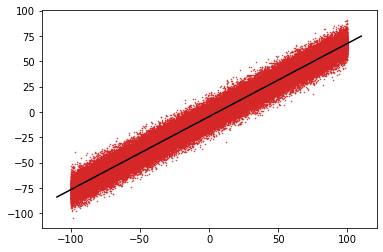

In [10]:
xm = 0.05*(x.max()-x.min())
xfit = np.array([x.min()-xm, x.max()+xm])
yfit = slope*xfit + yint
plt.plot(xfit, yfit, '-k')
plt.plot(x, y, ".C3", ms=1, zorder=-1)

Compare execution times of linfit and polyfit to fit a randomly generated data set of 10000 $(x,y)$ data points.  On my computers, linfit is about 6 times faster than polyfit for unweighted data and about 3 times faster for weighted data.

In [11]:
import timeit
setup = '''
from linfit import linfit
import numpy as np

def randomData(xmax, npts):
    x = np.random.uniform(-xmax, xmax, npts)
    scale = np.sqrt(xmax)
    a, b = scale * (np.random.rand(2)-0.5)
    y = a*x + b + a * scale * np.random.randn(npts)
    dy = a * scale * (1.0 + np.random.rand(npts))
    return x, y, dy

npts = 100000
x, y, dy = randomData(100., npts)
'''
nreps = 7
nruns = 100

linfitNOwt = min(timeit.Timer('fit, cvm = linfit(x, y)', setup=setup).repeat(nreps, nruns))
polyfitNOwt = min(timeit.Timer('slope, yint = np.polyfit(x, y, 1)', setup=setup).repeat(nreps, nruns))
print("TIME COMPARISON WITH NO WEIGHTING OF DATA")
print("  linfit time = {}\n polyfit time = {}\n        ratio = {}"
      .format(linfitNOwt, polyfitNOwt, polyfitNOwt/linfitNOwt))
linfitWT = min(timeit.Timer('slope, yint = linfit(x, y, sigmay=dy)', setup=setup).repeat(nreps, nruns))
polyfitWT = min(timeit.Timer('slope, yint = np.polyfit(x, y, 1, w=dy)', setup=setup).repeat(nreps, nruns))
print("TIME COMPARISON WITH WEIGHTING OF DATA")
print("  linfit time = {}\n polyfit time = {}\n        ratio = {}"
      .format(linfitWT, polyfitWT, polyfitWT/linfitWT))

TIME COMPARISON WITH NO WEIGHTING OF DATA
  linfit time = 0.04812828300000005
 polyfit time = 0.3567316079999996
        ratio = 7.412099201627434
TIME COMPARISON WITH WEIGHTING OF DATA
  linfit time = 0.08441347999999937
 polyfit time = 0.4123130230000003
        ratio = 4.884445268694091


### Using linear fitting routine for non-linear fitting

Linear fitting with weighting can be used to fit functions that are nonlinear in the fitting parameters, provided the fitting function can be transformed into one that is linear in the fitting paramters.  This can be done for exponential functions and power-law functions.  This approach is illusutrated in the next two examples.

#### Using an exponential fitting function with linfit

Nuclear decay provides a convenient example of an exponential fitting function: $N(t) = N_0 e^{-t/\tau}$.

Here are the $N$ vs $t$ data together with the uncertainties $\Delta N$.

In [12]:
t = np.array([0., 32.8, 65.6, 98.4, 131.2, 164., 196.8, 229.6, 262.4, 
              295.2, 328., 360.8, 393.6, 426.4, 459.2, 492.])
N = np.array([5.08, 3.29, 2.23, 1.48, 1.11, 0.644, 0.476, 0.273, 0.188, 
              0.141, 0.0942, 0.0768, 0.0322, 0.0322, 0.0198, 0.0198])
dN = np.array([0.11, 0.09, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03,
               0.02, 0.02, 0.015, 0.014, 0.009, 0.009, 0.007, 0.007])

Linear and semi-log plots of the data with error bars:

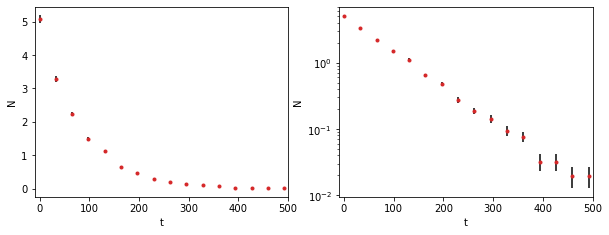

In [13]:
fig = plt.figure(1, figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_yscale("log")
for ax in [ax1, ax2]:
    ax.errorbar(t, N, yerr=dN, xerr=None, fmt='oC3', ecolor='k', ms=3)
    ax.set_xlim(-10, 500)
    ax.set_xlabel('t')
    ax.set_ylabel('N')

The semi-log plot suggests we can use linfit to fit the data by taking the logarithm of the $y$ data.  Taking the logarithm of the exponential fitting function gives $$\ln N = -\frac{t}{\tau} + \ln N_0\;.$$  Defining $y=\ln N$, $a=-1/\tau$, and $b=\ln N_0$, the equation takes the form $y = at+b$ and can be fit using linfit.

The uncertainties $\Delta y$ are related to $\Delta N$ by taking the differential of  the tranformation $y=\ln N$:
$$
\begin{align}
  \Delta y &= \left(\frac{\partial y}{\partial N}\right)\Delta N \\
           &= \frac{\Delta N}{N}
\end{align}
$$
To fit the data, we tranform the $N$ and $\Delta N$ data:

In [14]:
y = np.log(N)
dy = dN/N

Next we perform the fit on the tranformed data:

In [15]:
fit, cvm, info = linfit(t, y, sigmay=dy, relsigma=False, return_all=True)

Extract $\tau$ and $N_0$ from fit of transformed data

In [16]:
a, b = fit[0], fit[1]
tau = -1.0/a
N0 = np.exp(b)

Extract the uncertainties in the fitting parameters $a$ and $b$.

In [17]:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]
da, db = dfit[0], dfit[1]

Get the uncertainties in $\tau$ and $N_0$ from the transformation equations:
$$
\begin{align}
  \tau=−1/a
    \quad &\Rightarrow \Delta \tau = \left|\frac{\partial \tau}{\partial a}\right|\Delta a
    \quad \Rightarrow \Delta \tau = \frac{\Delta a}{a^2} \\
  N_0=e^b
    \quad &\Rightarrow \Delta N_0 = \left|\frac{\partial N_0}{\partial b}\right|\Delta b
    \quad  \Rightarrow \Delta N_0 = e^b\Delta b \\
\end{align}
$$

In [18]:
dtau = da/(a*a)
dN0 = np.exp(b)*db

Plot the data and fit on linear and semi-log plots

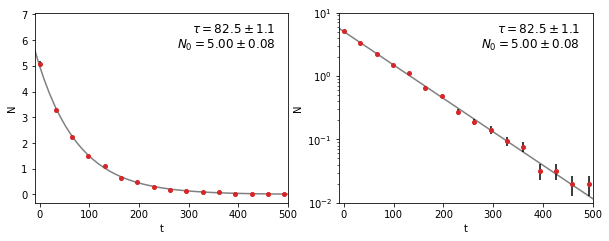

In [19]:
tm = 0.05*(t.max()-t.min())
tfit = np.linspace(t.min()-tm, t.max()+tm, 50) 
Nfit = N0*np.exp(-tfit/tau)
fig = plt.figure(1, figsize=(10, 3.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax2.set_yscale("log")
ax2.set_ylim(0.01, 10.)
for ax in [ax1, ax2]:
    ax.errorbar(t, N, yerr=dN, xerr=None, fmt='oC3', ecolor='k', ms=4)
    ax.plot(tfit, Nfit, '-', color="gray", zorder=-1)
    ax.set_xlim(-10, 500)
    ax.set_xlabel('t')
    ax.set_ylabel('N')
    ax.text(0.95, 0.95,"$\\tau = {0:0.1f}\pm{1:0.1f}$\n$N_0 = {2:0.2f}\pm{3:0.2f}$"
         .format(tau, dtau, N0, dN0), fontsize=12, 
         ha='right', va='top', transform=ax.transAxes)


A similar procedure can be used to fit data to a power-law $y=Ax^p$ with $A$ and $p$ as the fitting parameters.

### Need for linfit.py

Currently, there is no function available in numpy or scipy expressly designed to perform chi-squared least square fitting of a straight line to a single data set with weighting (error bars).  There are two functions available in numpy and scipy that can be adapted to fit single straight lines to data with weighting: ``numpy.polyfit`` and ``scipy.linalg.lstsq``.  Both of these have drawbacks if the desired task is to fit a straight line to a single data set.  In addition to these two functions, ``scipy.stats.linregress`` fits a straight line but without any provision for weighting.  

* numpy.polyfit and scipy.linalg.lstsq are both slower than ``linfit``: ``numpy.polyfit`` is generally a few times slower; scipy.linalg.lstsq is also a few times slower but can be several hundreds of times slower depending on the weighting used and the size of the data set.  This is because, in part, both ``numpy.polyfit`` and ``scipy.linalg.lstsq`` involve matrix inversion while linfit does not.  More generally, both ``numpy.polyfit`` and ``scipy.linalg.lstsq`` have significant overhead associated with the more general fitting problems they are designed to address.

* In its current configuration, ``numpy.polyfit`` does not allow absolute weighting of the data; only relative weighting is implemented.  ``linfit`` allows either relative (the default) or absolute weighting (by setting the keyword argument relsigma=False)